# __Fast Fourier Transform (FFT)__

In [18]:
from scipy.fft import fft, fftfreq,ifft,ifftshift
import numpy as np

In [19]:
f=1000 #Hz
N_sample = 8192
N_div=64
t_gap = (1/(f*N_div))*10**6 #us

In [20]:
################################ Generating Sine wave with a DC offset of 2V ################################
sine=[]
time=[]
for i in range(N_sample):
    # sine.append(2*(1-np.cos(2*np.pi*f*i*t_gap*10**-6)))
    sine.append(1  +   3*np.cos(2*np.pi*5*f*i*t_gap*10**-6)     + 2*np.cos(2*np.pi*4*f*i*t_gap*10**-6)  )
    time.append(i*t_gap*(10**-6))

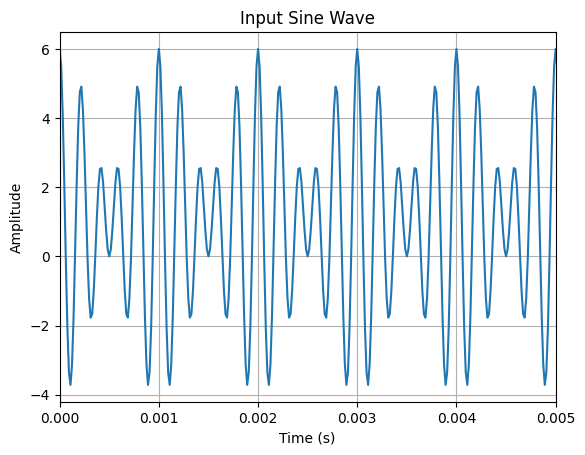

In [21]:
import matplotlib.pyplot as plt_spacetime
plt_spacetime.plot(time,sine)
plt_spacetime.xlabel('Time (s)')
plt_spacetime.ylabel('Amplitude')
plt_spacetime.title('Input Sine Wave')
plt_spacetime.grid(True)
plt_spacetime.xlim(0,0.005)
plt_spacetime.show()

In [22]:
freq=fftfreq(N_sample,time[1]-time[0])
sine_fft=fft(sine)
# print(sine_fft)

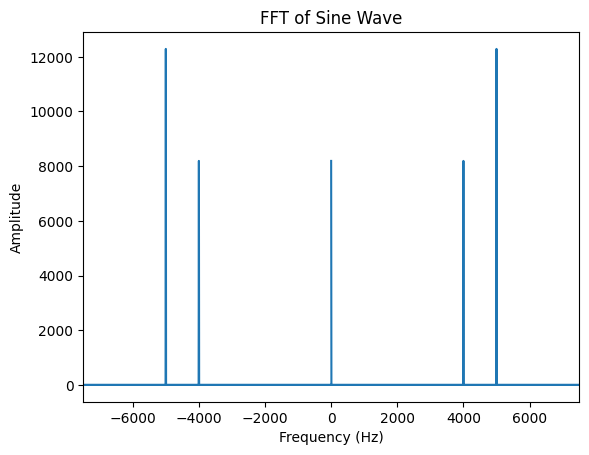

In [23]:
import matplotlib.pyplot as plt
# plt.plot(time,sine)
plt.plot(freq,sine_fft)
plt.xlim(-7500,7500)
# plt.axvline(x=1000, color='r', linestyle='--')
# plt.axvline(x=-1000, color='r', linestyle='--')
plt.title('FFT of Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

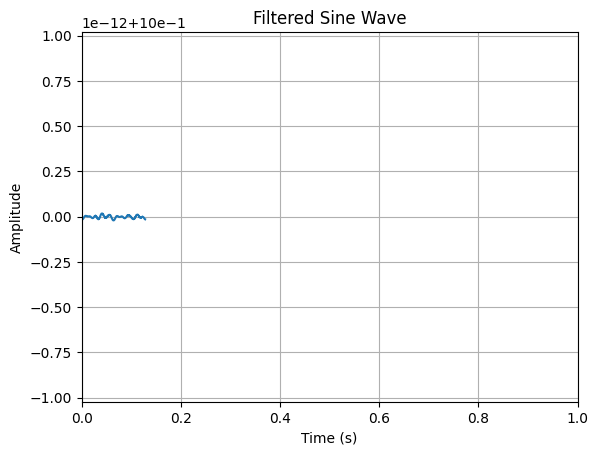

In [26]:
for i in range(len(sine_fft)):
    if abs(freq[i])>100:
        sine_fft[i]=0

sine_ifft=ifft(sine_fft)
# print(sine_ifft)
import matplotlib.pyplot as plt_spacetime_filtered
plt_spacetime_filtered.plot(time,sine_ifft)
plt_spacetime_filtered.xlabel('Time (s)')
plt_spacetime_filtered.ylabel('Amplitude')
plt_spacetime_filtered.title('Filtered Sine Wave')
plt_spacetime_filtered.grid(True)
plt_spacetime_filtered.xlim(0,1)
plt_spacetime_filtered.show()

